In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = [12,9]

In [4]:
def generateLattice(N):
    lattice= np.ones(N**2)
    lattice[:int(N**2/2)] *= -1
    np.random.shuffle(lattice)
    return lattice.reshape((N,N))

In [5]:
def generateS(N):
    A = np.zeros((N-1, N-1))
    np.fill_diagonal(A, 1)
    B = np.hstack((np.vstack((np.zeros(N-1), A)),np.zeros((N,1))))
    return B + B.T
    
@jit
def getEnergy(s, J, mu, H):
    ss = (np.dot(S,s) + np.dot(s,S))*s
    E = -J*np.sum(ss) - mu*H*np.sum(s)
    return E

@jit
def getMagnetisation(s):
    return np.mean(s)

@jit
def getDeltaE(i, j, s, J, H):
    q = s[(i-1)%N, j] + s[(i+1)%N, j] + s[i, (j-1)%N] + s[i, (j+1)%N]
    return 2*s[i,j]*(J*q + mu*H)

@jit
def doPertubation(s, N, J, H, beta):
    i, j = np.random.choice(N), np.random.choice(N)
    deltaE = getDeltaE(i, j, s, J, H)
    if deltaE < 0:
        s[i,j] *= -1
    elif np.random.random() < np.exp(-beta*deltaE):
        s[i,j] *= -1
    return s

In [12]:
def getC(Es, beta):
    Es = np.array(Es)
    return k_b*beta**2*(np.var(Es))

def getXi(Ms, beta):
    Ms = np.array(Ms)
    return beta*(np.var(Ms**2))

In [7]:
J = 1 # >0 ferro, <0 antiferro
mu = 1e-1 #between 1e-6 and 1
H = 0 #till 20?
k_b = 8.6e-5 #ev/K
N = 250
S = generateS(N)

### Check if the code works visually

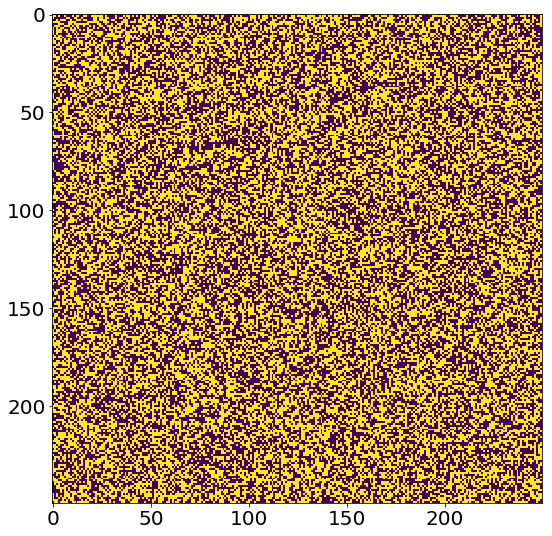

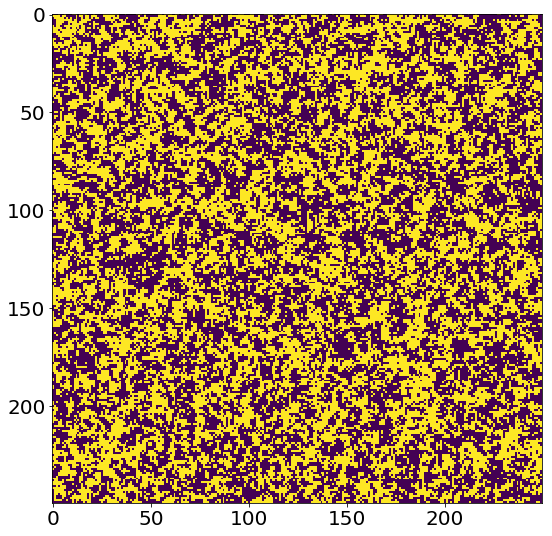

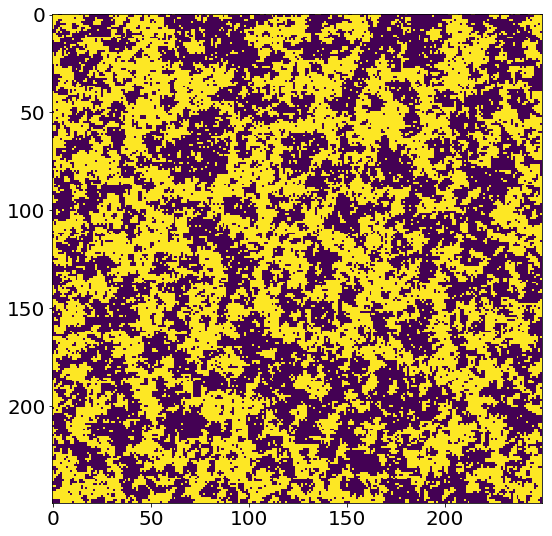

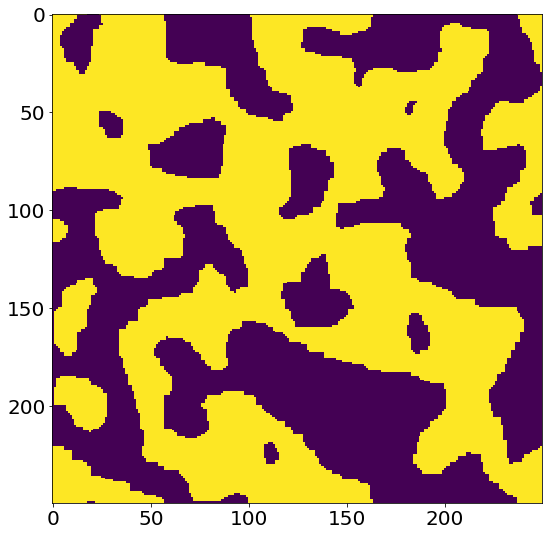

In [6]:
iterations = 5000000
lattice = generateLattice(N)

# Initial state
plt.imshow(lattice)
plt.show()

# High temp
T = 40000 #K
beta = 1/(k_b*T)
for n in range(iterations):
    lattice = doPertubation(lattice, N, J, H, beta)

plt.imshow(lattice)
plt.show()

# T_c
T = 30000 #K
beta = 1/(k_b*T)
for n in range(iterations):
    lattice = doPertubation(lattice, N, J, H, beta)

plt.imshow(lattice)
plt.show()

# Low temp
T = 3000 #K
beta = 1/(k_b*T)
for n in range(iterations):
    lattice = doPertubation(lattice, N, J, H, beta)

plt.imshow(lattice)
plt.show()

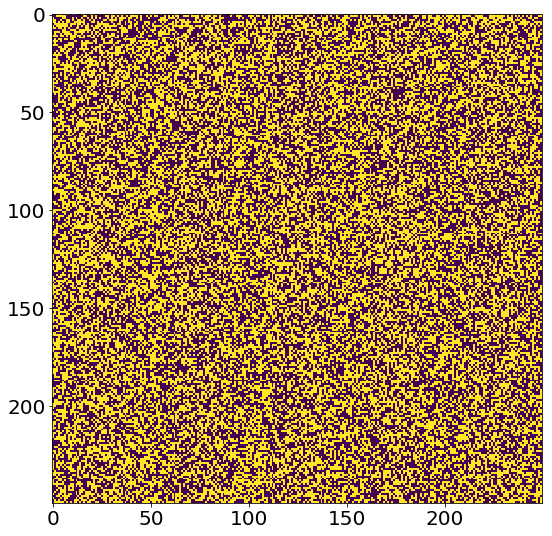

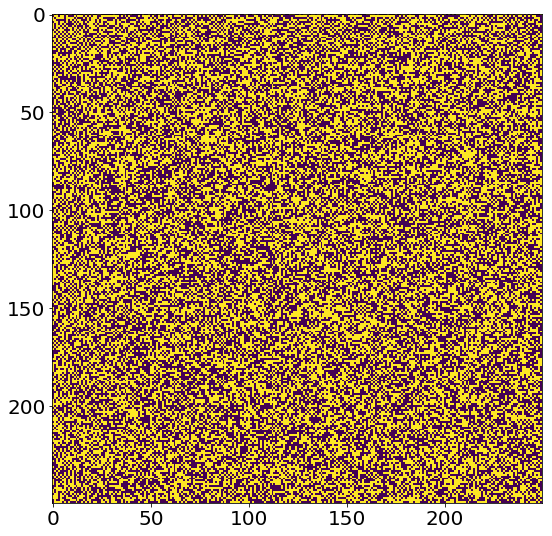

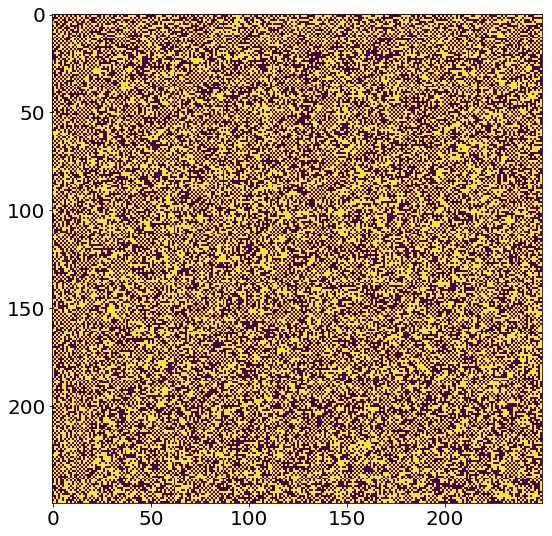

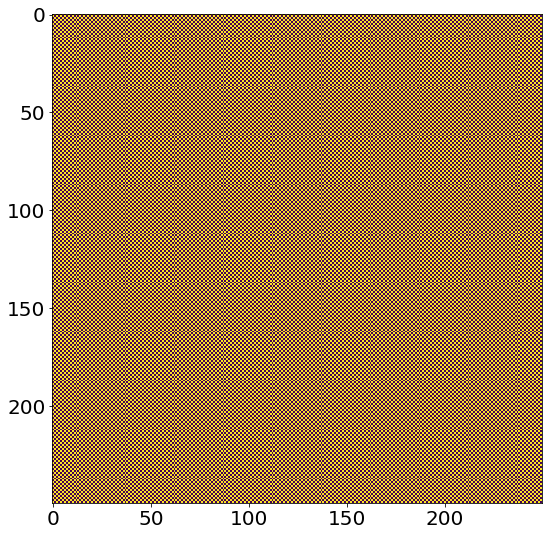

In [23]:
# Now for an antiferro magnet
N = 250
S = generateS(N)
J = -1

iterations = 5000000
lattice = generateLattice(N)

# Initial state
plt.imshow(lattice)
plt.show()

# High temp
T = 40000 #K
beta = 1/(k_b*T)
for n in range(iterations):
    lattice = doPertubation(lattice, N, J, H, beta)

plt.imshow(lattice)
plt.show()

# T_c
T = 30000 #K
beta = 1/(k_b*T)
for n in range(iterations):
    lattice = doPertubation(lattice, N, J, H, beta)

plt.imshow(lattice)
plt.show()

# Low temp
T = 3000 #K
beta = 1/(k_b*T)
for n in range(iterations):
    lattice = doPertubation(lattice, N, J, H, beta)

plt.imshow(lattice)
plt.show()

### Look for behaviour as function of temperature

In [8]:
N = 20
S = generateS(N)
iterations = 50000
J = 1

Ts = np.linspace(1000, 50000, 1000)
Es, Ms = [], []
for T in Ts:
    beta = 1/(k_b*T)
    lattice = generateLattice(N)
    for n in range(iterations):
        lattice = doPertubation(lattice, N, J, H, beta)

    Es.append(getEnergy(lattice, J, mu, H))
    Ms.append(getMagnetisation(lattice))

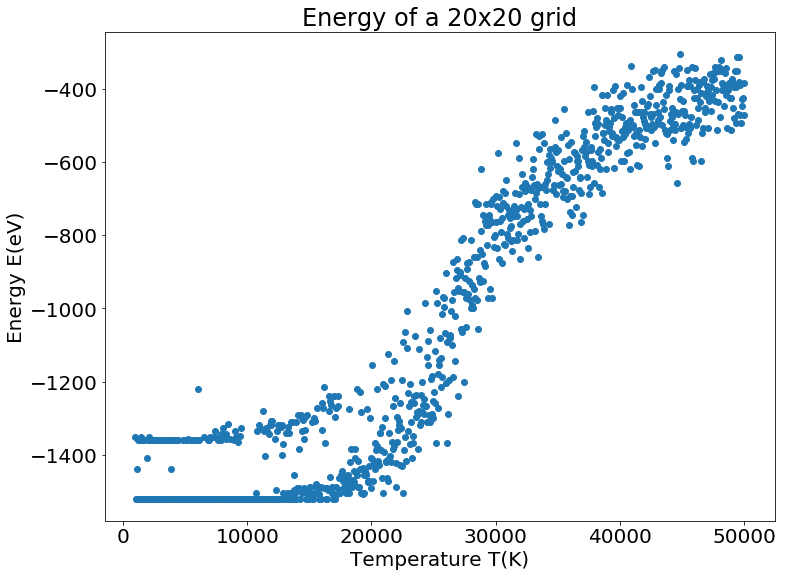

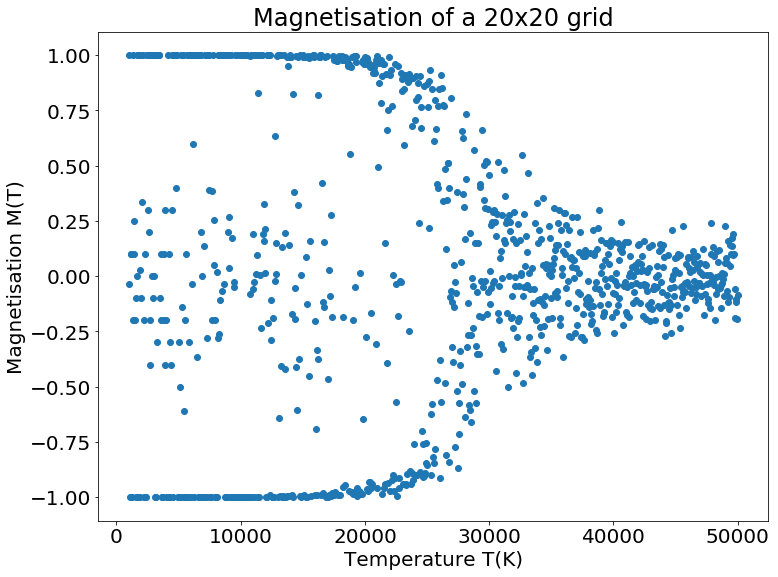

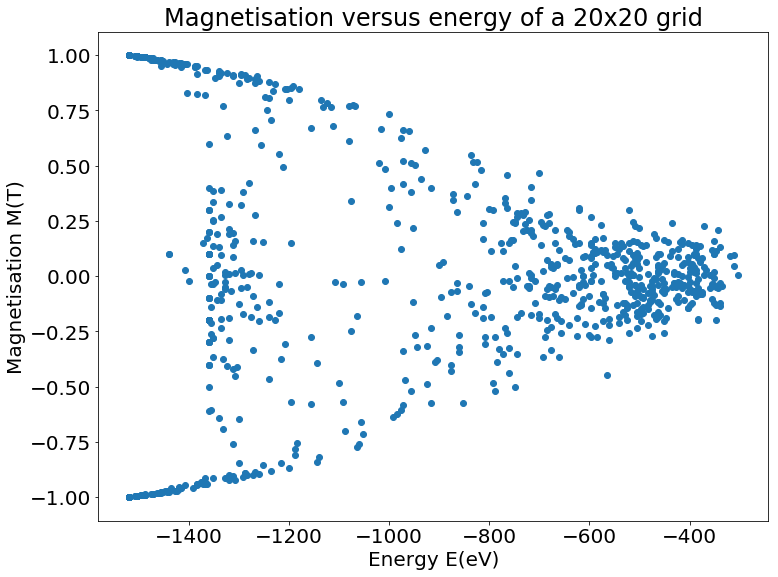

In [32]:
plt.scatter(Ts, Es)
plt.title("Energy of a %dx%d grid"%(N,N))
plt.xlabel("Temperature T(K)")
plt.ylabel("Energy E(eV)")
plt.show()
plt.scatter(Ts, Ms)
plt.title("Magnetisation of a %dx%d grid"%(N,N))
plt.xlabel("Temperature T(K)")
plt.ylabel("Magnetisation M(T)")
plt.show()
plt.scatter(Es, Ms)
plt.title("Magnetisation versus energy of a %dx%d grid"%(N,N))
plt.xlabel("Energy E(eV)")
plt.ylabel("Magnetisation M(T)")
plt.show()

The cases where zero magnetisation is found below $T_c$ are due to that we initiated the system in these temperatures. If we start te system above $T_c$ and then cool the system down to the desired temperature, we see no cases where the magnetisation is zero below $T_c$.

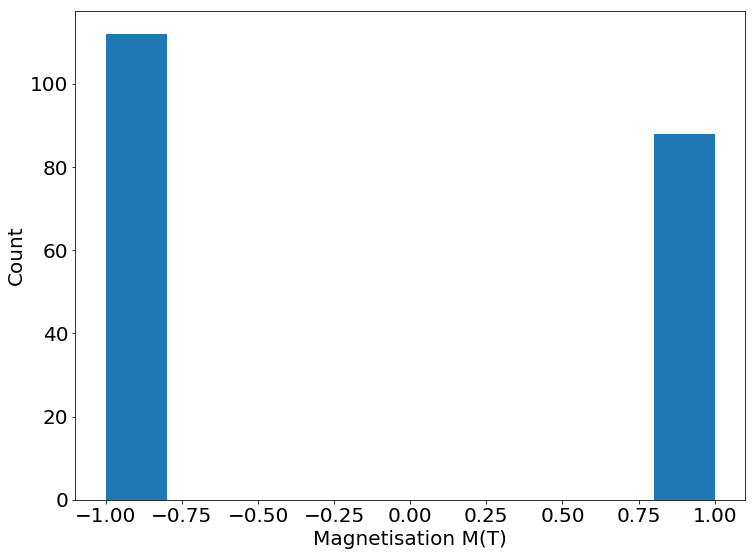

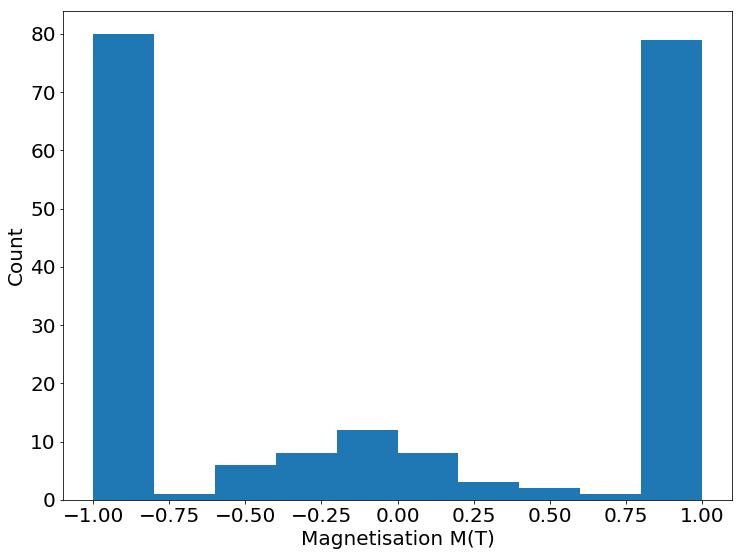

In [115]:
iterations = N**2
H = 0

# Cooling down
Ts = np.linspace(40000, 10000, 1000)
Es, Ms = [], []
for i in range(200):
    lattice = generateLattice(N)
    for T in Ts:
        beta = 1/(k_b*T)
        for n in range(iterations):
            lattice = doPertubation(lattice, N, J, H, beta)

    Ms.append(getMagnetisation(lattice))
       
plt.xlabel('Magnetisation M(T)')
plt.ylabel('Count') 
plt.hist(Ms)
plt.show()

# No cooling down
Es, Ms = [], []
for i in range(200):
    lattice = generateLattice(N)
    for n in range(iterations*len(Ts)):
        lattice = doPertubation(lattice, N, J, H, beta)

    Ms.append(getMagnetisation(lattice))
    
plt.xlabel('Magnetisation M(T)')
plt.ylabel('Count')
plt.hist(Ms)
plt.show()

### Look at behaviour as function of external magnetic field (hysteresis)

In [ ]:
iterations = 50*N**2
# T = 15000 # For histeresis
T = 45000
beta = 1/(k_b*T)
lattice = generateLattice(N)
H_max = 20
J = 1
M = 400

Hs = np.hstack([
    np.linspace(0, H_max, 25), 
    np.linspace(H_max, -H_max, 50),
    np.linspace(-H_max, H_max, 25)
])

for i in range(iterations*10):
    lattice = doPertubation(lattice, N, J, H, beta)

Es, Es_mean, Es_std = [], [], []
Ms, Ms_mean, Ms_std = [], [], []
for H in Hs:
    beta = 1/(k_b*T)
    e_l, m_l = np.empty(M), np.empty(M)
    for m in range(M):
        for n in range(iterations):
            lattice = doPertubation(lattice, N, J, H, beta)
        e_l[m] = getEnergy(lattice, J, mu, H) 
        m_l[m] = getMagnetisation(lattice)
    
    Es.append(e_l)
    Es_mean.append(np.mean(e_l))
    Es_std.append(np.std(e_l)/np.sqrt(M))
    Ms.append(m_l)
    Ms_mean.append(np.mean(m_l))
    Ms_std.append(np.std(m_l)/np.sqrt(M))

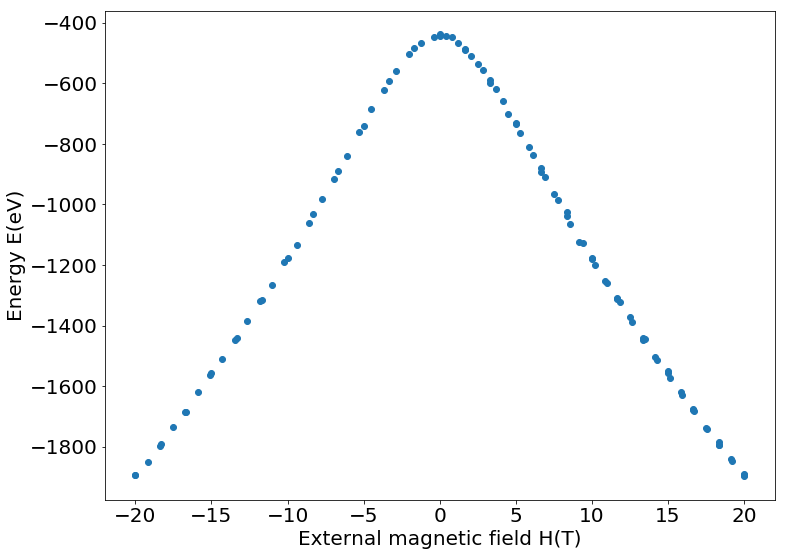

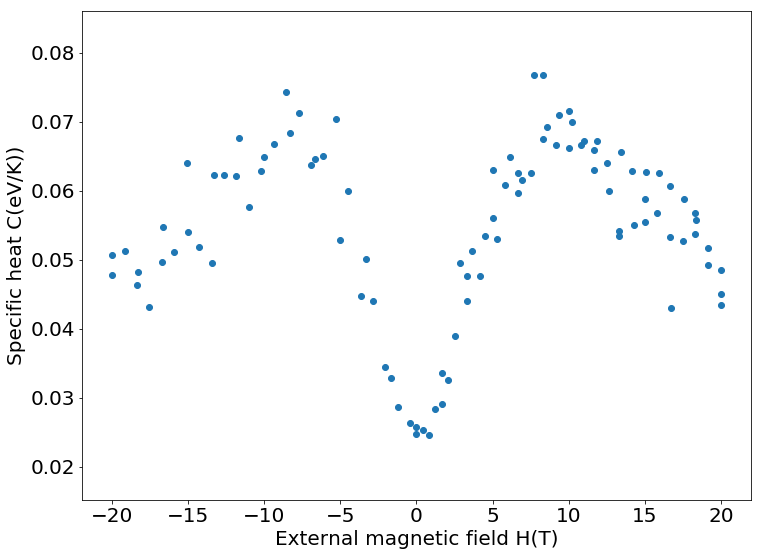

In [10]:
plt.errorbar(Hs, Es_mean, yerr=Es_std, fmt='o')
plt.xlabel("External magnetic field H(T)")
plt.ylabel("Energy E(eV)")
plt.show()

Cs = [getC(E, beta) for E in Es]
plt.scatter(Hs, Cs)
plt.xlabel("External magnetic field H(T)")
plt.ylabel("Specific heat C(eV/K))")
plt.show()

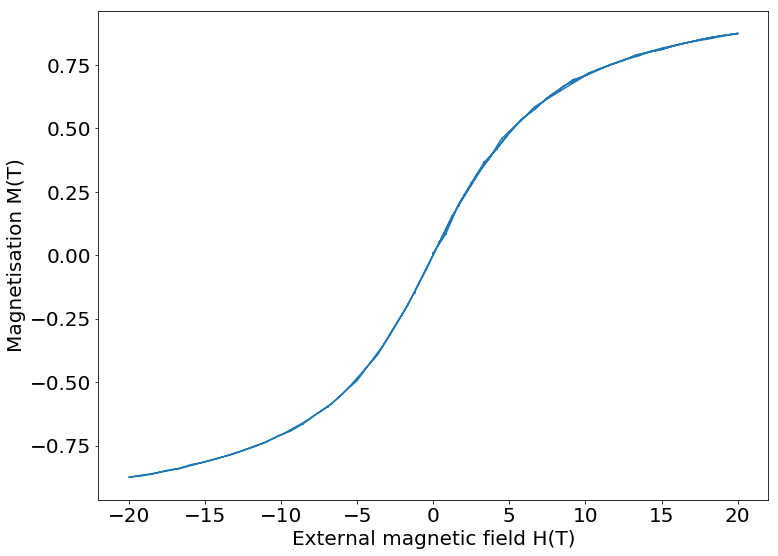

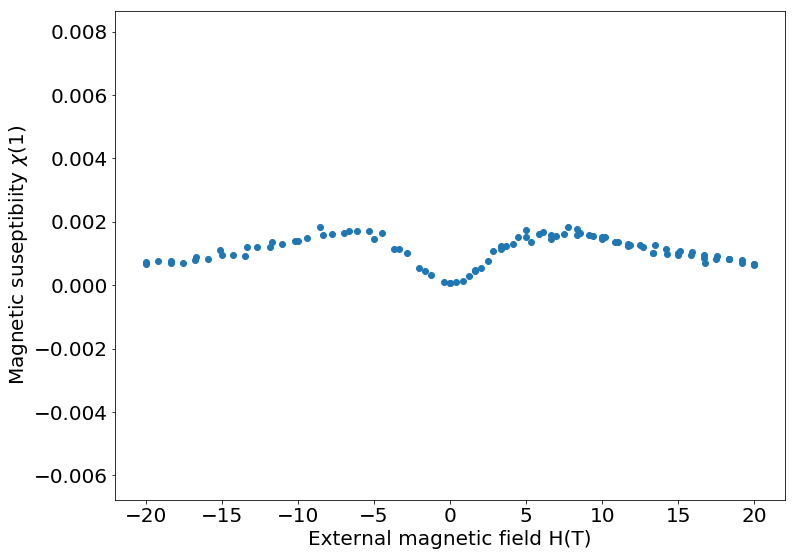

In [11]:
plt.errorbar(Hs, Ms_mean, yerr=Ms_std)
plt.xlabel("External magnetic field H(T)")
plt.ylabel("Magnetisation M(T)")
plt.show()

Xis = [getXi(M, beta) for M in Ms]
plt.scatter(Hs, Xis)
plt.xlabel("External magnetic field H(T)")
plt.ylabel(r"Magnetic suseptibiity $\chi(1)$")
plt.show()